# Data Analysis of Indian Prisoners in Foreign Jails

### Load and Preprocess the Data

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.ticker import FuncFormatter

# Load the dataset
data = pd.read_excel("Indian_Prisoners.xlsx")  
# Rename columns for easier access
data.columns = ["Country", "Indian Prisoners"]

# Sort by number of prisoners
data = data.sort_values(by="Indian Prisoners", ascending=False)

# Get the top 10 countries
top_10 = data.head(10)

# Print summary insights
print("Total Countries in Dataset:", data.shape[0])
print("Top 10 Countries with Most Indian Prisoners:\n", top_10)


Total Countries in Dataset: 86
Top 10 Countries with Most Indian Prisoners:
            Country  Indian Prisoners
67    Saudi Arabia              2633
79             UAE              2518
56           Nepal              1317
63           Qatar               611
40          Kuwait               387
47        Malaysia               338
81  United Kingdom               288
60        Pakistan               266
6          Bahrain               181
15           China               173


### Top 10 Countries with Most Indian Prisoners:

In [7]:
# Load the dataset
data = pd.read_excel("death_sentence.xlsx") 

# Rename columns for easier access
data.columns = ["Country", "Number of Prisoners"]

# Sort by number of prisoners
data = data.sort_values(by="Number of Prisoners", ascending=False)

# Get the top 10 countries
top_10 = data.head(10)

# Print summary insights
print("Total Countries in Dataset:", data.shape[0])
print("Top 10 Countries with Most Indian Prisoners:\n", top_10)


Total Countries in Dataset: 8
Top 10 Countries with Most Indian Prisoners:
         Country  Number of Prisoners
5           UAE                   25
4  Saudi Arabia                   11
2      Malaysia                    6
1        Kuwait                    3
0     Indonesia                    1
3         Qatar                    1
6           USA                    1
7         Yemen                    1


### Total Number of Indian Prisoners

In [8]:
import pandas as pd

data = pd.read_excel("Indian_Prisoners.xlsx")

data.columns = ["Country", "Indian Prisoners"]
total_prisoners = data["Indian Prisoners"].sum()
print("Total number of Indians in foreign jails:", total_prisoners)



Total number of Indians in foreign jails: 10152


### Top 10 Countries by Percentage Contribution

In [9]:
# Calculate percentage contribution of each country
data["Percentage"] = (data["Indian Prisoners"] / total_prisoners) * 100

# Sort by percentage in descending order
data_sorted = data.sort_values(by="Percentage", ascending=False)

# Get the top 10 countries by percentage
top_10_percentage = data_sorted.head(10)

# Print results
print("Top 10 Countries by Percentage of Indian Prisoners:\n", top_10_percentage[["Country", "Percentage"]])


Top 10 Countries by Percentage of Indian Prisoners:
            Country  Percentage
67    Saudi Arabia   25.935776
79             UAE   24.802994
56           Nepal   12.972813
63           Qatar    6.018519
40          Kuwait    3.812057
47        Malaysia    3.329393
81  United Kingdom    2.836879
60        Pakistan    2.620173
6          Bahrain    1.782900
15           China    1.704098


In [10]:
print("Descriptive Statistics of Indian Prisoners:\n", data["Indian Prisoners"].describe())


Descriptive Statistics of Indian Prisoners:
 count      86.000000
mean      118.046512
std       417.013723
min         1.000000
25%         2.250000
50%         6.000000
75%        32.500000
max      2633.000000
Name: Indian Prisoners, dtype: float64


### Countries with More than 50 Indian Prisoners

In [11]:
high_prisoners = data[data["Indian Prisoners"] > 50]
print("Countries with More than 50 Indian Prisoners:\n", high_prisoners)


Countries with More than 50 Indian Prisoners:
            Country  Indian Prisoners  Percentage
6          Bahrain               181    1.782900
10          Bhutan                69    0.679669
15           China               173    1.704098
34           Italy               168    1.654846
40          Kuwait               387    3.812057
47        Malaysia               338    3.329393
56           Nepal              1317   12.972813
59            Oman               148    1.457841
60        Pakistan               266    2.620173
63           Qatar               611    6.018519
67    Saudi Arabia              2633   25.935776
70       Singapore                92    0.906225
73       Sri Lanka                98    0.965327
79             UAE              2518   24.802994
81  United Kingdom               288    2.836879
82             USA               169    1.664697


### Countries with Less than 5 Indian Prisoners

In [12]:
low_prisoners = data[data["Indian Prisoners"] < 5]
print("Countries with Less than 5 Indian Prisoners:\n", low_prisoners)



Countries with Less than 5 Indian Prisoners:
                 Country  Indian Prisoners  Percentage
1                Angola                 2    0.019701
2             Argentina                 1    0.009850
7            Bangladesh                 4    0.039401
9               Belgium                 1    0.009850
14                Chile                 1    0.009850
18              Croatia                 3    0.029551
19                 Cuba                 2    0.019701
21              Denmark                 1    0.009850
22                Egypt                 1    0.009850
23             Ethiopia                 4    0.039401
27            Guatemala                 2    0.019701
28               Guinea                 2    0.019701
31                 Iraq                 1    0.009850
33               Israel                 4    0.039401
35              Jamaica                 1    0.009850
38           Kazakhstan                 3    0.029551
39                Kenya             

### Correlation Between Indian Labor Migration and Imprisonment Rates in the Middle East

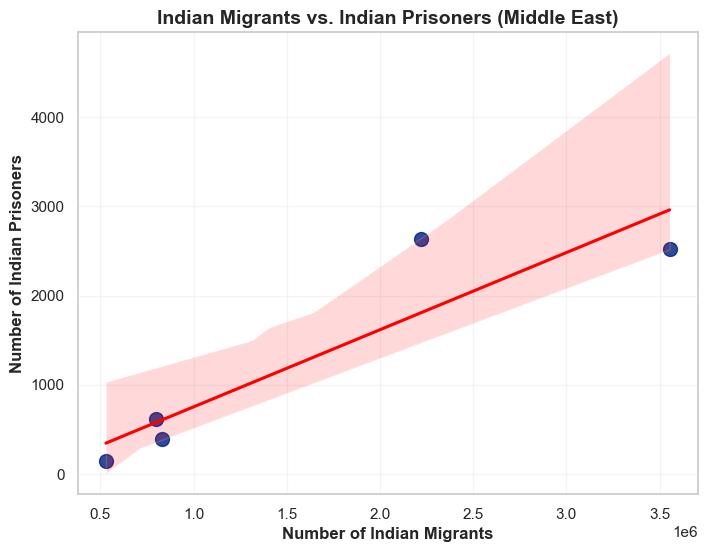

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

countries = ["UAE", "Saudi Arabia", "Kuwait", "Qatar", "Oman"]
migrants = [35.54, 22.19, 8.29, 8.00, 5.30]  

prisoners = [2518, 2633, 387, 611, 148] 

# Convert migrants from lakhs to absolute numbers for consistency
migrants_abs = [x * 100000 for x in migrants]

# Create a DataFrame
df = pd.DataFrame({"Country": countries, "Migrants": migrants_abs, "Prisoners": prisoners})

sns.set_theme(style="whitegrid", palette="dark")

# 1. Scatter Plot with Trend Line
plt.figure(figsize=(8, 6))
sns.regplot(x=df["Migrants"], y=df["Prisoners"], scatter_kws={"s": 100}, line_kws={"color": "red"})
plt.xlabel("Number of Indian Migrants", fontsize=12, fontweight='bold')
plt.ylabel("Number of Indian Prisoners", fontsize=12, fontweight='bold')
plt.title("Indian Migrants vs. Indian Prisoners (Middle East)", fontsize=14, fontweight='bold')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.2)
plt.show()


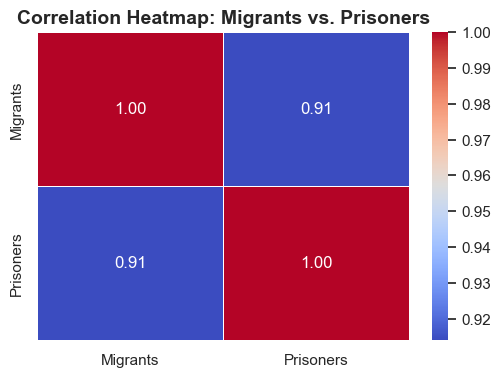

In [19]:
#Correlation Heatmap
plt.figure(figsize=(6, 4))
corr = df[["Migrants", "Prisoners"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Migrants vs. Prisoners", fontsize=14, fontweight='bold')
plt.show()
